<a href="https://colab.research.google.com/github/PierDiella/BigData_Rep/blob/main/COMPLETE_Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Higher Education Students Performance Evaluation

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import math, copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Importing Dataset and descritpion

In [2]:
df=pd.read_csv("student_prediction.csv")

df.head(10)


,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
5,STUDENT6,2,2,2,3,2,2,2,2,1,...,1,1,1,2,1,2,4,4,1,2
6,STUDENT7,1,2,2,4,2,2,2,1,1,...,1,1,3,3,3,3,4,4,1,5
7,STUDENT8,1,1,2,3,1,1,1,2,2,...,3,1,3,2,2,1,1,1,1,2
8,STUDENT9,2,1,3,3,2,1,1,1,1,...,1,1,3,2,2,2,4,3,1,5
9,STUDENT10,2,1,2,3,2,2,1,3,4,...,1,1,2,2,2,2,1,2,1,0


Attribute Information:

Student ID

1- Student Age (1: 18-21, 2: 22-25, 3: above 26)

2- Sex (1: female, 2: male)

3- Graduated high-school type: (1: private, 2: state, 3: other)

4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)

5- Additional work: (1: Yes, 2: No)

6- Regular artistic or sports activity: (1: Yes, 2: No)

7- Do you have a partner: (1: Yes, 2: No)

8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)

9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)

10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)

11- Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

12- Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)

13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)

14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)

15- Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)

16- Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)

17- Weekly study hours: (1: None, 2: 1-5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)


18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)

19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)

20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)

21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)

22- Attendance to classes (1: always, 2: sometimes, 3: never)

23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)

24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)

25- Taking notes in classes: (1: never, 2: sometimes, 3: always)

26- Listening in classes: (1: never, 2: sometimes, 3: always)

27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)

28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)

29- Cumulative grade point average in the last semester (/4.00): (1: 0.00-2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

30- Expected Cumulative grade point average in the graduation (/4.00): (1: 0.00-2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)

31- Course ID

32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

For each feature, the mean, standard deviation, minimum value, maximum value, and corresponding 25%, 50%, and 75% are calculated

In [4]:
df.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
AGE,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
GENDER,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
HS_TYPE,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
SCHOLARSHIP,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
WORK,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
ACTIVITY,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
PARTNER,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
SALARY,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
TRANSPORT,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
LIVING,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


#Preprocessing

In [5]:
#check missing values

df.isnull().sum()


STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

In [6]:
#check duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE


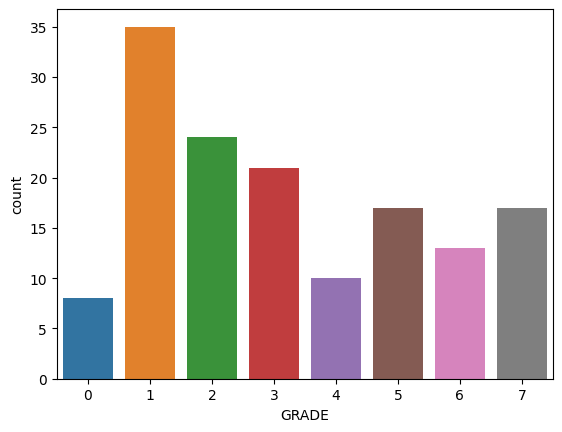

In [ ]:
#just an example of "GRADE" distrubution, wich will be the output
sns.countplot(data=df, x=df["GRADE"], label="count")
plt.show()


<Axes: ylabel='Density'>

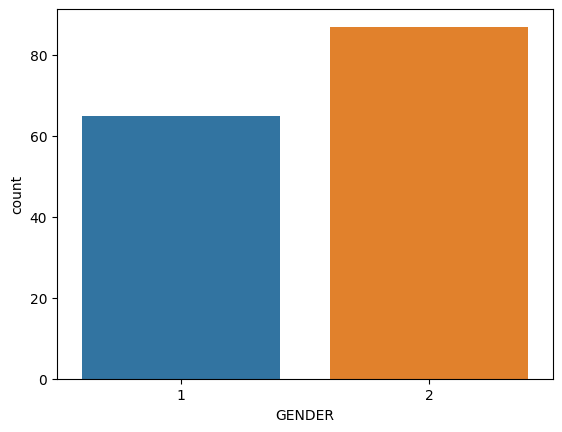

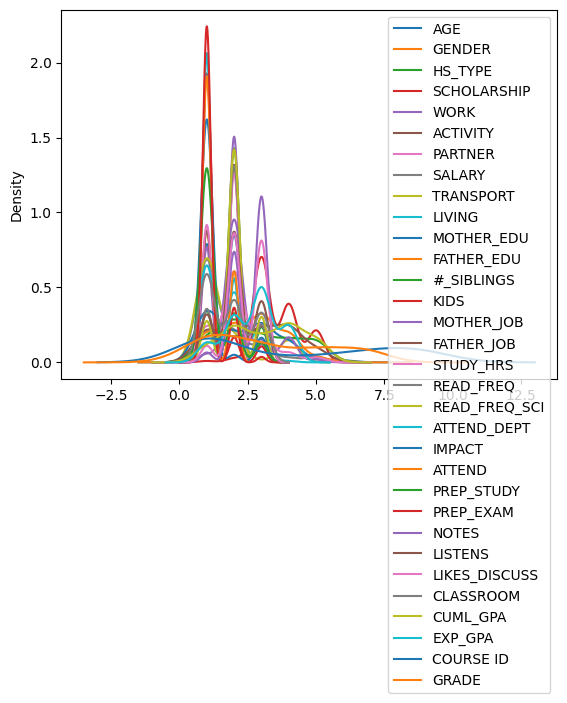

In [ ]:
#variable distrubution eplorating, just some examples of useful plot

sns.countplot(data=df, x=df["AGE"], label="count")
#plt.show()

sns.countplot(data=df, x=df["GENDER"], label="count")
#plt.show()

df.plot(kind='kde')



In [7]:
X1 = df[['AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT', 'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS', 'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA']].to_numpy()                 #converte dataframe in array


Y1 = df[['GRADE']].to_numpy()

X2 = np.array(X1, dtype=float)
Y2 = np.array(Y1, dtype=float)

print(X2)

print(Y2)

print(X2.shape)
print(Y2.shape)

[[2. 2. 3. ... 2. 1. 1.]
 [2. 2. 3. ... 2. 2. 3.]
 [2. 2. 2. ... 1. 2. 2.]
 ...
 [1. 1. 1. ... 1. 4. 3.]
 [2. 1. 2. ... 1. 5. 3.]
 [1. 1. 1. ... 1. 5. 4.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [5.]
 [2.]
 [5.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [1.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [5.]
 [5.]
 [3.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [3.]
 [5.]
 [3.]
 [1.]
 [2.]
 [1.]
 [4.]
 [1.]
 [5.]
 [3.]
 [3.]
 [5.]
 [4.]
 [3.]
 [5.]
 [2.]
 [5.]
 [3.]
 [5.]
 [3.]
 [2.]
 [5.]
 [1.]
 [5.]
 [5.]
 [7.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [4.]
 [7.]
 [4.]
 [3.]
 [4.]
 [3.]
 [7.]
 [7.]
 [7.]
 [4.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [4.]
 [6.]
 [5.]
 [7.]
 [6.]
 [7.]
 [7.]
 [6.]
 [7.]
 [7.]
 [7.]
 [3.]
 [7.]
 [7.]
 [6.]
 [6.]
 [7.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [0.]
 [2.]
 [1.]
 [3.]
 [2.]
 [3.]
 [1.]
 [0.]
 [3.]
 [1.]
 [4.]
 [3.]
 [3.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [5.

!!! CHOSE ONLY ONE METHOD

Normalizatione: Squared N.

In [ ]:
X = normalize(X2, norm='l2')


Y=Y2
print(X)
print(Y)

[[0.1796053  0.1796053  0.26940795 ... 0.1796053  0.08980265 0.08980265]
 [0.18490007 0.18490007 0.2773501  ... 0.18490007 0.18490007 0.2773501 ]
 [0.1933473  0.1933473  0.1933473  ... 0.09667365 0.1933473  0.1933473 ]
 ...
 [0.07881104 0.07881104 0.07881104 ... 0.07881104 0.31524416 0.23643312]
 [0.14948702 0.07474351 0.14948702 ... 0.07474351 0.37371755 0.22423053]
 [0.07254763 0.07254763 0.07254763 ... 0.07254763 0.36273813 0.2901905 ]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [5.]
 [2.]
 [5.]
 [0.]
 [2.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [1.]
 [2.]
 [3.]
 [1.]
 [1.]
 [3.]
 [5.]
 [5.]
 [3.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [1.]
 [3.]
 [5.]
 [3.]
 [1.]
 [2.]
 [1.]
 [4.]
 [1.]
 [5.]
 [3.]
 [3.]
 [5.]
 [4.]
 [3.]
 [5.]
 [2.]
 [5.]
 [3.]
 [5.]
 [3.]
 [2.]
 [5.]
 [1.]
 [5.]
 [5.]
 [7.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [4.]
 [7.]
 [4.]
 [3.]
 [4.]
 [3.]
 [7.]
 [7.]
 [7.]
 [4.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.

MinMax Scaler

In [9]:
scaler = MinMaxScaler(feature_range=(0, 5))                                      # regularization

X = scaler.fit_transform(X2)



scaler = MinMaxScaler(feature_range=(0, 5))

Y1 = scaler.fit_transform(Y2)
Y = np.ravel(Y1)

print(X)

print(Y)

[[2.5        5.         5.         ... 2.5        0.         0.        ]
 [2.5        5.         5.         ... 2.5        1.25       3.33333333]
 [2.5        5.         2.5        ... 0.         1.25       1.66666667]
 ...
 [0.         0.         0.         ... 0.         3.75       3.33333333]
 [2.5        0.         2.5        ... 0.         5.         3.33333333]
 [0.         0.         0.         ... 0.         5.         5.        ]]
[0.71428571 0.71428571 0.71428571 0.71428571 0.71428571 1.42857143
 3.57142857 1.42857143 3.57142857 0.         1.42857143 0.
 0.         0.71428571 1.42857143 1.42857143 0.71428571 1.42857143
 1.42857143 2.14285714 0.71428571 0.71428571 2.14285714 0.71428571
 1.42857143 2.14285714 0.71428571 0.71428571 2.14285714 3.57142857
 3.57142857 2.14285714 0.71428571 1.42857143 1.42857143 0.71428571
 1.42857143 0.71428571 1.42857143 0.71428571 0.71428571 0.71428571
 0.71428571 2.85714286 0.71428571 2.14285714 3.57142857 2.14285714
 0.71428571 1.42857143 0.714

# Multiple Linear Regression - Definition

In [10]:
X_tmp=X
Y_tmp=Y

def compute_cost_linear_reg(X, Y, W, b, lamda_):

 m = X.shape[0]
 n = len(W)
 cost = 0
 for i in range(m):
 #X_i = x[i,:]
  X = X_tmp[i,:]
  f_wb_xi = np.dot(W,X) + b

  cost = cost / (2*m)

  reg_cost = 0
  for j in range(n):
    reg_cost += (W[j]**2)
    reg_cost = (lamda_/(2*m)) * reg_cost

    total_cost = cost + reg_cost
 return total_cost

np.random.seed(1)


def compute_multiple_gradient(X, Y, W, b):

  m = X.shape[0] #number of samples
  n = X.shape[1] #number of features

  dj_dW = np.zeros(n)
  dj_db = 0

  for i in range(m): #for each sample
    X_i = X[i,:]
    f_xi = np.dot(W, X_i) + b; #prediction
    err_i = f_xi-Y[i]   #error=prediction-ground_truth
    for j in range(n): #for each features class
      x_ji = X[i, j]
      #print('f_xi = {}'.format(f_xi));
      #print('Y[i] = {}'.format(Y[i]));
      dj_dW[j] = dj_dW[j] + (1/m)*x_ji*err_i;
      #print('dj_dW[j] = {}'.format(dj_dW[j]))
    dj_db = dj_db + (1/m)*err_i;
  return dj_dW, dj_db


def multiple_gradient_descent (X, Y, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient):

  W = W_in
  b = b_in



  for itt in range(num_iters):

    dj_dw, dj_db = compute_multiple_gradient(X, Y, W, b)
    W = W - alpha * dj_dw
    b = b - alpha * dj_db
    cost = compute_cost_linear_reg(X, Y, W, b, lamda_)
    if itt % 100 == 0:
        print('Itteration {}:, (W,b) = ({}, {}),\n cost = {}'.format(itt, W, b,cost))
  return W, b, cost





In [13]:
#training model with all dataset


W_in = np.ones(30)
b_in = random.uniform(0, 3)


lamda_=1
alpha = 0.0001
#alpha = 0.003282 #convergenza meno lenta §25
#alpha = 0.0001   #convergenza lenta
num_iters = 10000

multiple_gradient_descent(X, Y, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient)



Itteration 0:, (W,b) = ([0.99069726 0.98203219 0.98620121 0.98136719 0.98054293 0.98210649
 0.98282134 0.99538057 0.99368654 0.99296954 0.9924307  0.99044836
 0.98676797 0.99729812 0.99018228 0.98686715 0.9911806  0.9861299
 0.98508996 0.99347323 0.99681684 0.99272408 0.99500185 0.99741777
 0.97734009 0.98468316 0.9795205  0.98765391 0.98420715 0.98281517], 0.08452227614853773),
 cost = 0.0033423362857110885
Itteration 100:, (W,b) = ([ 0.51191275  0.09057734  0.28566145  0.03743227  0.01364017  0.08256978
  0.11550434  0.74841961  0.6597941   0.62598021  0.60094434  0.50166498
  0.32178642  0.8489397   0.48437306  0.31878295  0.53925965  0.28060292
  0.22295908  0.64513526  0.82023922  0.60987404  0.72543913  0.85911619
 -0.1671044   0.20646267 -0.05184223  0.36412314  0.19302548  0.11695411], -0.20886690033034572),
 cost = 4.7614895001306576e-05
Itteration 200:, (W,b) = ([ 0.3968105  -0.07403656  0.13230406 -0.16599481 -0.1668292  -0.10154282
 -0.0669017   0.67513058  0.56615596  0.53

(array([-0.15868568,  0.19193775,  0.16221431, -0.05454845,  0.17726294,
        -0.06152513,  0.02013159, -0.04451911, -0.13768577,  0.17639408,
         0.10142119,  0.04316323,  0.11978817,  0.12742807,  0.05001746,
        -0.04190391,  0.03721874,  0.16932986, -0.06152158, -0.0096976 ,
        -0.00211515, -0.01142409,  0.0004471 ,  0.27060504, -0.0821204 ,
         0.16753041, -0.00608868,  0.00501129,  0.22159232, -0.00719005]),
 -0.32344235826673406,
 7.62132370221495e-07)

# Training and Test

In [14]:


X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print("Array originale:\n", X)
print("Array diviso per colonne:\n X_train:", X_train, "\n X_test:", X_test, "\n Y_train:",Y_train, "\n Y_test:",Y_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)




Array originale:
 [[2.5        5.         5.         ... 2.5        0.         0.        ]
 [2.5        5.         5.         ... 2.5        1.25       3.33333333]
 [2.5        5.         2.5        ... 0.         1.25       1.66666667]
 ...
 [0.         0.         0.         ... 0.         3.75       3.33333333]
 [2.5        0.         2.5        ... 0.         5.         3.33333333]
 [0.         0.         0.         ... 0.         5.         5.        ]]
Array diviso per colonne:
 X_train: [[2.5        5.         2.5        ... 0.         1.25       3.33333333]
 [2.5        0.         0.         ... 2.5        1.25       1.66666667]
 [0.         5.         0.         ... 5.         1.25       3.33333333]
 ...
 [2.5        5.         2.5        ... 5.         5.         5.        ]
 [2.5        0.         2.5        ... 0.         2.5        3.33333333]
 [2.5        0.         2.5        ... 0.         0.         0.        ]] 
 X_test: [[2.5        0.         2.5        ... 0.       

In [19]:
X_tmp = X_train
Y_tmp = Y_train

W_in = np.ones(30)
b_in = random.uniform(0, 3)

lamba_=1
alpha = 0.0001

num_iters = 10000
W,b,cost= multiple_gradient_descent(X_train, Y_train, W_in, b_in, alpha, num_iters, compute_cost_linear_reg, compute_multiple_gradient)

print("W:",W)

print("b:",b)

Itteration 0:, (W,b) = ([0.99026558 0.98176339 0.98472777 0.98036268 0.97969408 0.981404
 0.9841804  0.99470498 0.99313979 0.99252232 0.99291777 0.99048715
 0.98597173 0.9975356  0.98959139 0.98599742 0.99098148 0.98565386
 0.98394195 0.99215622 0.99598817 0.99187998 0.99491716 0.99733881
 0.9759171  0.98445613 0.97894314 0.98653314 0.98427076 0.98219085], 2.4479421597459132),
 cost = 0.004799598081543591
Itteration 100:, (W,b) = ([ 0.48628009  0.07652319  0.20417011 -0.01820518 -0.02926231  0.04249909
  0.17987719  0.71325542  0.62708106  0.60111713  0.62287205  0.5033734
  0.2791217   0.85821628  0.44896647  0.27417732  0.5264233   0.25591626
  0.16303913  0.56915733  0.77456663  0.56458512  0.71897777  0.85475175
 -0.24137288  0.18870615 -0.08331209  0.31214038  0.19593774  0.0831004 ], 2.1405081588522465),
 cost = 3.5139221676189175e-05
Itteration 200:, (W,b) = ([ 0.36198976 -0.08948759  0.02740158 -0.23642347 -0.21486159 -0.15338115
  0.00451808  0.63287989  0.52078792  0.49883387

In [20]:
Y_pred = np.dot(X_test, W) + b

print(Y_pred)

[2.49090567 2.21042884 1.72397414 3.30347406 4.39006521 3.12831704
 3.83517277 1.64242447 2.96520818 2.83547479 2.75742264 3.47043195
 1.76769803 2.89962795 3.58906839 3.74045023 3.29864792 2.69121107
 3.15740798 1.32170027 1.81404988 0.99041285 1.58814844 3.36187589
 1.84110772 3.10712152 2.01219604 1.58796018 3.36689594 3.32990565
 2.88797162 2.43877642 3.0430356  2.31435664 2.76313259 2.10961843
 1.16855355 3.58414859 4.78782943 4.60250042 1.17466852 0.55238106
 1.30513281 2.94888061]


In [21]:
mse_tst = mean_squared_error(Y_test, Y_pred)
print(f"Il Mean Squared error del test set è : {mse_tst:.3f}")



Il Mean Squared error del test set è : 3.598
